In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from models_fit_rmse import algoModel


In [2]:
diamonds = pd.read_csv('input/diamonds-datamad0120/diamonds_train.csv')
values = {'Premium': 5, 'Ideal': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}

for index, row in diamonds.iterrows():
    if row['cut'] in values.keys():
        diamonds.loc[index, 'cutW'] = values[row['cut']]

In [3]:
diamonds_num = diamonds.drop(columns=['id','cut', 'x', 'y', 'z'])
diamonds_num = pd.get_dummies(diamonds_num)
diamonds_num.head()

,carat,depth,table,price,cutW,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.78,61.5,58.0,3446,5.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0.31,60.8,56.0,732,4.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.30,62.3,54.0,475,4.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,1.04,62.0,58.0,9552,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.65,61.4,55.0,1276,4.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [4]:
gb_rg = GradientBoostingRegressor(n_estimators= 2500, max_depth= 4, min_samples_split= 2)

In [5]:
predictors = ['carat', 'depth', 'table', 'cutW', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

In [6]:
X = diamonds_num[predictors]
y = diamonds_num['price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
gb_rg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
print(gb_rg.score(X_train, y_train))
print(gb_rg.score(X_test, y_test))

0.9917401631435991
0.9801708993438615


In [10]:
print('RMSE', np.sqrt(mean_squared_error(y_test, gb_rg.predict(X_test))))

RMSE 557.4000701977304


In [11]:
y_pred = gb_rg.predict(X_test)

Text(0, 0.5, 'Real price')

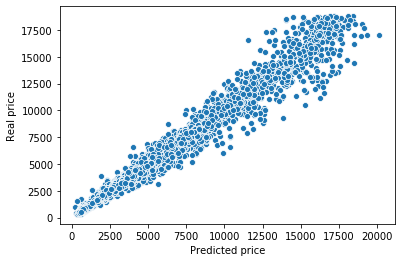

In [12]:
#plt.scatter(y_pred, y_test)
sns.scatterplot(y_pred, y_test)
plt.xlabel("Predicted price")
plt.ylabel("Real price")

In [13]:
gb_rg.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
diamonds_test = pd.read_csv('input/diamonds-datamad0120/diamonds_test.csv')
values = {'Premium': 5, 'Ideal': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}

for index, row in diamonds_test.iterrows():
    if row['cut'] in values.keys():
        diamonds_test.loc[index, 'cutW'] = values[row['cut']]

In [15]:
X_test = diamonds_test
X_test = X_test.drop(columns=['id', 'cut', 'x', 'y', 'z'])

In [16]:
X_test = pd.get_dummies(X_test)

In [17]:
y_pred = gb_rg.predict(X_test)
y_pred

array([ 4330.63062117,  1057.26675383, 16077.64076212, ...,
         513.58870843,   739.17205997,  2105.57911815])

In [18]:
diamonds_new = pd.DataFrame()
diamonds_new['id'] = diamonds_test['id']

In [19]:
diamonds_new['price'] = pd.Series(y_pred)

In [20]:
diamonds_new.to_csv('diamonds_pred14', index=False)